In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv('bikes_train.csv') # , index_col=0 to use the datetime column as the DataFrame index
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.shape

(10886, 12)

In [4]:
data.isnull().values.any()

False

In [5]:
data.dropna()
data.shape

(10886, 12)

In [6]:
def transform_data(data):
    data.datetime = data.datetime.apply(pd.to_datetime)
    data['month'] = data.datetime.apply(lambda x : x.month)
    data['hour'] = data.datetime.apply(lambda x : x.hour)
    data['day'] = data.datetime.apply(lambda x : x.timetuple().tm_yday)
    data['dayofweek'] = data.datetime.apply(lambda x : x.isoweekday())
    data.head()
    
transform_data(data)

In [7]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data)

In [8]:
fit_columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'hour', 'dayofweek']

In [49]:
from sklearn.preprocessing import *

model = Pipeline([#('scaler', Normalizer()),
                  ('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

model_result = model.fit(train_data[fit_columns], train_data[["count"]])

In [50]:
test_predictions = model.predict(test_data[fit_columns])
test_predictions.shape

(2722, 1)

In [51]:
test_data["prediction"] = np.ravel(test_predictions)
test_data.head()

D:\lib\anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,dayofweek,prediction
8949,2012-08-15 06:00:00,3,0,1,1,26.24,29.545,78,7.0015,12,160,172,8,6,228,3,150.850196
3654,2011-09-03 04:00:00,3,0,0,1,25.42,29.545,73,11.0014,3,4,7,9,4,246,6,119.164037
9700,2012-10-08 13:00:00,4,1,0,2,17.22,21.210,62,12.9980,82,323,405,10,13,282,1,365.970536
416,2011-01-19 09:00:00,1,0,1,2,9.84,12.880,93,7.0015,2,107,109,1,9,19,3,126.694150
4277,2011-10-10 06:00:00,4,1,0,1,18.04,21.970,94,0.0000,5,39,44,10,6,283,1,109.802087


In [52]:
print("The mean square error is %d" % np.mean((test_data["prediction"] - test_data["count"]) ** 2))

The mean square error is 14458


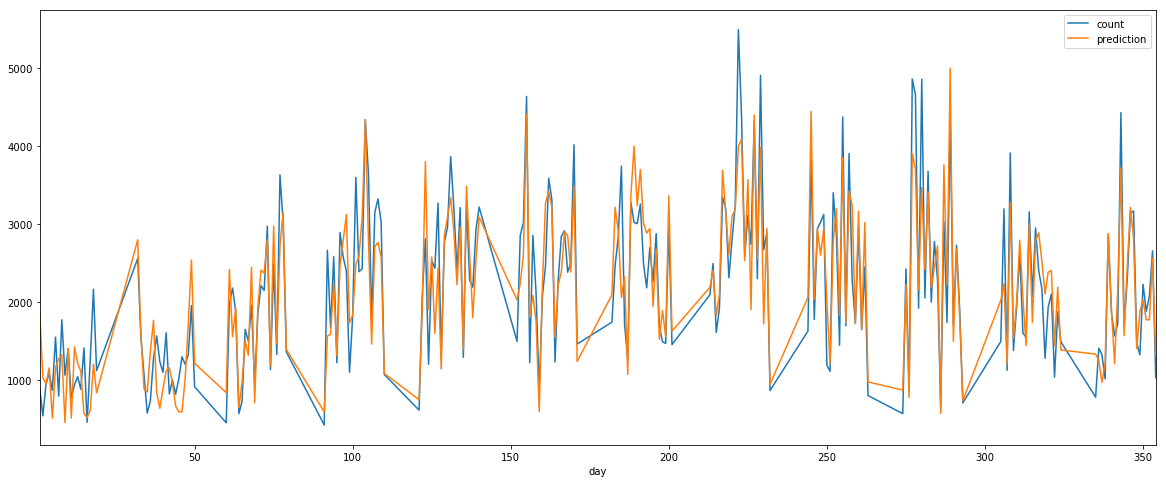

In [53]:
test_data[["day", "count", "prediction"]].groupby("day").aggregate(np.sum).plot(figsize=(20, 8))

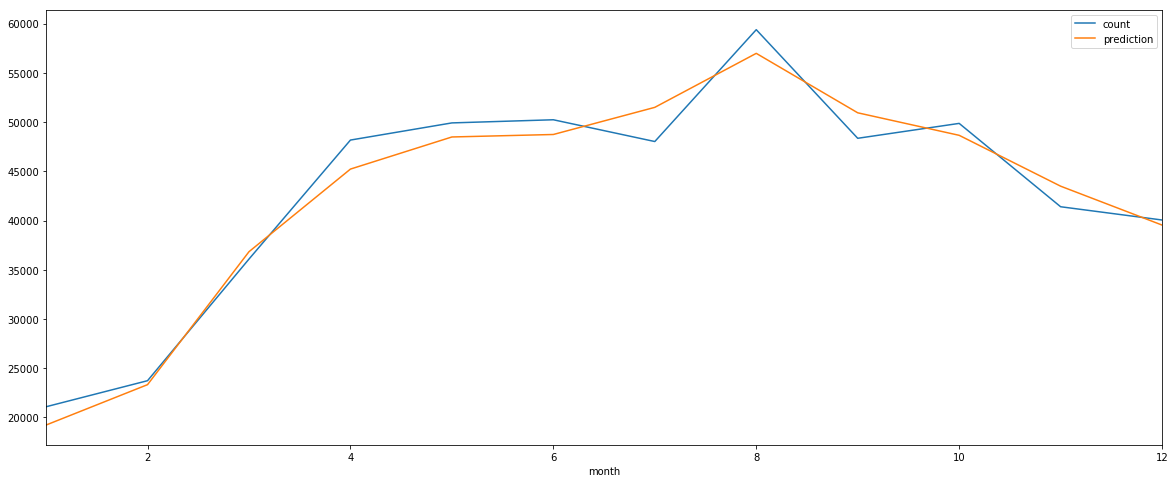

In [54]:
test_data[["month", "count", "prediction"]].groupby("month").aggregate(np.sum).plot(figsize=(20, 8))

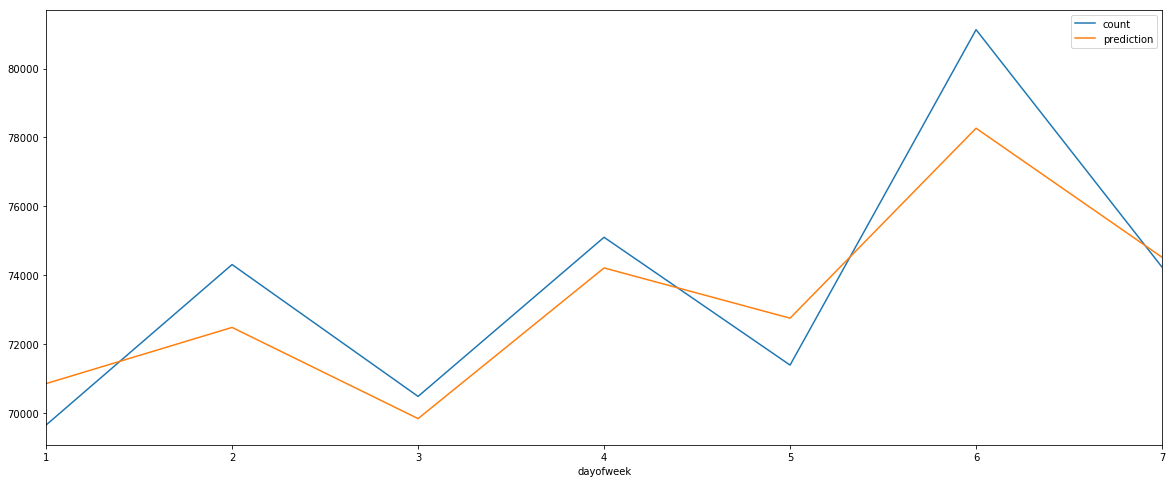

In [55]:
test_data[["dayofweek", "count", "prediction"]].groupby("dayofweek").aggregate(np.sum).plot(figsize=(20, 8))

In [70]:
model_result.named_steps["poly"].get_feature_names(fit_columns)

['1',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'month',
 'hour',
 'dayofweek',
 'season^2',
 'season holiday',
 'season workingday',
 'season weather',
 'season temp',
 'season atemp',
 'season humidity',
 'season windspeed',
 'season month',
 'season hour',
 'season dayofweek',
 'holiday^2',
 'holiday workingday',
 'holiday weather',
 'holiday temp',
 'holiday atemp',
 'holiday humidity',
 'holiday windspeed',
 'holiday month',
 'holiday hour',
 'holiday dayofweek',
 'workingday^2',
 'workingday weather',
 'workingday temp',
 'workingday atemp',
 'workingday humidity',
 'workingday windspeed',
 'workingday month',
 'workingday hour',
 'workingday dayofweek',
 'weather^2',
 'weather temp',
 'weather atemp',
 'weather humidity',
 'weather windspeed',
 'weather month',
 'weather hour',
 'weather dayofweek',
 'temp^2',
 'temp atemp',
 'temp humidity',
 'temp windspeed',
 'temp month',
 'temp hour',
 'temp dayofweek',
 'atemp^2',
 'at